In [27]:
# Otto cycle simulator

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Engine geometrical parameters
bore=0.8
stroke=0.2
con_rod=0.15
cr=10

In [30]:
def engine_kinematics(bore,stroke,con_rod,cr,theta1,theta2):
  v_stroke=(math.pi*pow(bore,2)*stroke)/4
  v_clear=v_stroke/(cr-1)
  a=stroke/2;
  R=con_rod/a
  theta=np.linspace(theta1,theta2,180)
  V=[]
  for t in theta:
    A=(0.5)*(cr-1)
    B=R+1-math.cos(math.radians(t))
    C=pow((R**2)-(math.sin(math.radians(t))**2),0.5)
    V.append((1+(A*(B-C)))*v_clear)
  return V

In [31]:
#known state variables
p1=101325
#gamma
y=1.4
t1=450
t3=3050
#calculation of volumes
v_stroke=(math.pi*pow(bore,2)*stroke)/4
v_clear=v_stroke/(cr-1)
#state 1
v1=v_stroke+v_clear
#state 2
v2=v_clear
p2=pow(v1/v2,y)*p1
t2=pow(v1/v2,y-1)*t1
#state 3
v3=v2
p3=p2*(t3/t2)

In [34]:
#state 4
v4=v1
p4=pow(v3/v4,y)*p3
t4=pow(v3/v4,y-1)*t3
#During Compression stroke
v_comp=engine_kinematics(bore,stroke,con_rod,cr,180,0)
c1=p1*pow(v1,y)
p_comp=[]
for v in v_comp:
  p_comp.append(c1/(pow(v,y)))
#During Expansion stroke
v_exp=engine_kinematics(bore,stroke,con_rod,cr,0,180)
c2=p3*pow(v3,y)
p_exp=[]
for ve in v_exp:
  p_exp.append(c2/(pow(ve,y)))


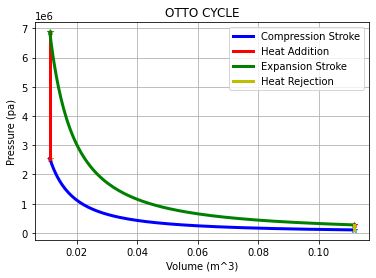

Efficiency of engine =  0.6018928294465027


In [35]:
#plotting state point
plt.plot(v1,p1,'*')
plt.plot(v2,p2,'*')
plt.plot(v3,p3,'*')
plt.plot(v4,p4,'*')
plt.plot(v_comp,p_comp, "-b",linewidth=3,label="Compression Stroke")
plt.plot([v2,v3],[p2,p3], "-r",linewidth=3,label="Heat Addition")
plt.plot(v_exp,p_exp, "-g",linewidth=3,label="Expansion Stroke")
plt.plot([v1,v4],[p1,p4], "-y",linewidth=3,label="Heat Rejection")
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (pa)')
plt.legend()
plt.title('OTTO CYCLE')
plt.grid()
plt.show()
#Calculation efficiency
n=1-((t4-t1)/(t3-t2))
print('Efficiency of engine = ', n); 